<a href="https://colab.research.google.com/github/Viveksapkale22/saiket_intenship_task-s/blob/main/Saiket_system_intenship_Task_4_%26_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data science Inenship Work .

**Project Name**: Customer Churn Analysis and Prediction

The project aims to analyze customer churn in a
telecommunications company and develop
predictive models to identify at-risk customers. The
ultimate goal is to provide actionable insights and
recommendations to reduce churn and improve
customer retention.


Task 4: Churn Prediction Model  and Task 5: Model Evaluation and Interpretation

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Sem-8 work/Intenship_Work/saiket_intenship_selected_1monthvirtualinten/cleaned_churn_data.csv')

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1.0,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34.0,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2.0,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45.0,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2.0,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
bool_cols = df.select_dtypes(include='bool').columns
print(bool_cols)


Index(['OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [ ]:
df[bool_cols] = df[bool_cols].astype(int)
df.dtypes


,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,float64
PhoneService,int64
PaperlessBilling,int64
MonthlyCharges,float64
TotalCharges,float64
Churn,int64


In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']


**Model 1: Baseline Logistic Regression (All Features, No Tuning)**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)
y_prob = log_model.predict_proba(X_test_scaled)[:, 1]
print(y_pred)
print(y_prob)
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("evaluaton:\n",accuracy, precision, recall, f1)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# probabilities already computed earlier
y_prob_m1 = log_model.predict_proba(X_test_scaled)[:, 1]

fpr1, tpr1, _ = roc_curve(y_test, y_prob_m1)
auc1 = roc_auc_score(y_test, y_prob_m1)

print("Model 1 AUC:", auc1)



[0 0 0 ... 0 0 1]
[0.18648833 0.33675229 0.0495206  ... 0.49362124 0.01509941 0.53849579]
evaluaton:
 0.8071090047393364 0.6590909090909091 0.5686274509803921 0.6105263157894737
Confusion Matrix:
[[1384  165]
 [ 242  319]]
Model 1 AUC: 0.8377534122986597


Insight

Very good accuracy

Poor churn detection (low recall)

Misses many churners ❌

📌 Not suitable for churn prediction

**Model 2: Logistic Regression + Feature Selection (No Tuning)**

Feature seelection = use correlations + imp feature , also remove the MultipleLines_No phone service  like no service stuff because it make multicollinearity.



Interpreting coefficients/features importance

In [ ]:
corr_with_target = df.corr()['Churn'].sort_values(ascending=False)
print(corr_with_target)

Churn                                    1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
MonthlyCharges                           0.192858
PaperlessBilling                         0.191454
SeniorCitizen                            0.150541
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
PhoneService                             0.011691
gender                                  -0.008545
MultipleLines_No phone service          -0.011691
DeviceProtection_Yes                    -0.066193
OnlineBackup_Yes                        -0.082307
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Partner                                 -0.149982
Dependents                              -0.163128
TechSupport_Yes                         -0.164716
OnlineSecurity_Yes                      -0.171270


In [ ]:
final_features_X = [
    'Contract_Two year',
    'Contract_One year',
    'InternetService_Fiber optic',
    'MonthlyCharges',
    'PaperlessBilling',
    'PaymentMethod_Electronic check',
    'SeniorCitizen',
    'tenure',
    'OnlineSecurity_Yes',
    'TechSupport_Yes',
    'TotalCharges'
]

print(final_features_X)
train_new_X = df[final_features_X]

['Contract_Two year', 'Contract_One year', 'InternetService_Fiber optic', 'MonthlyCharges', 'PaperlessBilling', 'PaymentMethod_Electronic check', 'SeniorCitizen', 'tenure', 'OnlineSecurity_Yes', 'TechSupport_Yes', 'TotalCharges']


In [ ]:
from sklearn.model_selection import train_test_split

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(
    train_new_X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled_n = scaler.fit_transform(X_train_n)
X_test_scaled_n = scaler.transform(X_test_n)
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled_n, y_train_n)

y_pred_n = log_model.predict(X_test_scaled_n)
y_prob_n = log_model.predict_proba(X_test_scaled_n)[:, 1]
print("Predictions:", y_pred_n)
print("Probabilities:", y_prob_n)
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)

accuracy = accuracy_score(y_test_n, y_pred_n)
precision = precision_score(y_test_n, y_pred_n)
recall = recall_score(y_test_n, y_pred_n)
f1 = f1_score(y_test_n, y_pred_n)

print(f"\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}")

conf_matrix = confusion_matrix(y_test_n, y_pred_n)
print("\nConfusion Matrix:")
print(conf_matrix)

y_prob_m2 = log_model.predict_proba(X_test_scaled_n)[:, 1]

fpr2, tpr2, _ = roc_curve(y_test_n, y_prob_m2)
auc2 = roc_auc_score(y_test_n, y_prob_m2)

print("Model 2 AUC:", auc2)


Predictions: [0 0 0 ... 0 0 0]
Probabilities: [0.24392479 0.30305179 0.06183416 ... 0.47265727 0.0237491  0.46868435]

Accuracy: 0.7943127962085308
Precision: 0.6365591397849463
Recall: 0.5276292335115864
F1 Score: 0.5769980506822612

Confusion Matrix:
[[1380  169]
 [ 265  296]]
Model 2 AUC: 0.835111261477418


Insight

Simpler and more interpretable

Recall dropped further

Still misses too many churners ❌

📌 Good for understanding drivers, not deployment

Model 3: GridSearchCV (All Features, recall-Optimized)
GridSearchCV: It tries all combinations of hyperparameters and selects the best one using cross-validation.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': ['balanced']
}
lr = LogisticRegression(max_iter=1000)

grid = GridSearchCV(
    lr,
    param_grid,
    cv=5,
    scoring='recall',   # IMPORTANT for churn
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

y_pred_n1 = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_n1)
precision = precision_score(y_test, y_pred_n1)
recall = recall_score(y_test, y_pred_n1)
f1 = f1_score(y_test, y_pred_n1)

print("Tuned Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_test, y_pred_n)
print("Confusion Matrix:")
print(conf_matrix)

y_prob_m3 = best_model.predict_proba(X_test_scaled)[:, 1]

fpr3, tpr3, _ = roc_curve(y_test, y_prob_m3)
auc3 = roc_auc_score(y_test, y_prob_m3)

print("Model 3 AUC:", auc3)


Best Parameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Model Evaluation:
Accuracy: 0.7184834123222749
Precision: 0.48250265111346763
Recall: 0.8110516934046346
F1 Score: 0.6050531914893617
Confusion Matrix:
[[1380  169]
 [ 265  296]]
Model 3 AUC: 0.8361319878617566


Insight

Recall ↑↑ (very good churn capture)

Precision moderate

Balanced F1 score

📌 Strong candidate for real-world churn detection

Model 4: GridSearchCV + Feature Selection (FINAL MODEL)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': ['balanced']
}
lr = LogisticRegression(max_iter=1000)

grid = GridSearchCV(
    lr,
    param_grid,
    cv=5,
    scoring='f1',   # IMPORTANT for churn
    n_jobs=-1
)

grid.fit(X_train_n, y_train_n)
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)
y_pred_n1  = best_model.predict(X_test_n)
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)

accuracy = accuracy_score(y_test_n, y_pred_n1)
precision = precision_score(y_test_n, y_pred_n1)
recall = recall_score(y_test_n, y_pred_n1)
f1 = f1_score(y_test_n, y_pred_n1)

print(accuracy, precision, recall, f1)
conf_matrix = confusion_matrix(y_test_n, y_pred_n)
print("Confusion Matrix:")
print(conf_matrix)

y_prob_m4 = best_model.predict_proba(X_test_n)[:, 1]

fpr4, tpr4, _ = roc_curve(y_test_n, y_prob_m4)
auc4 = roc_auc_score(y_test_n, y_prob_m4)

print("Model 4 AUC:", auc4)


Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
0.7341232227488151 0.5 0.8057040998217468 0.6170648464163823
Confusion Matrix:
[[1380  169]
 [ 265  296]]
Model 4 AUC: 0.8351676488425054


Insight

Highest Recall

Best F1 score

Fewer features → less multicollinearity

Easier to explain & deploy

📌 ✅ THIS IS THE BEST MODEL

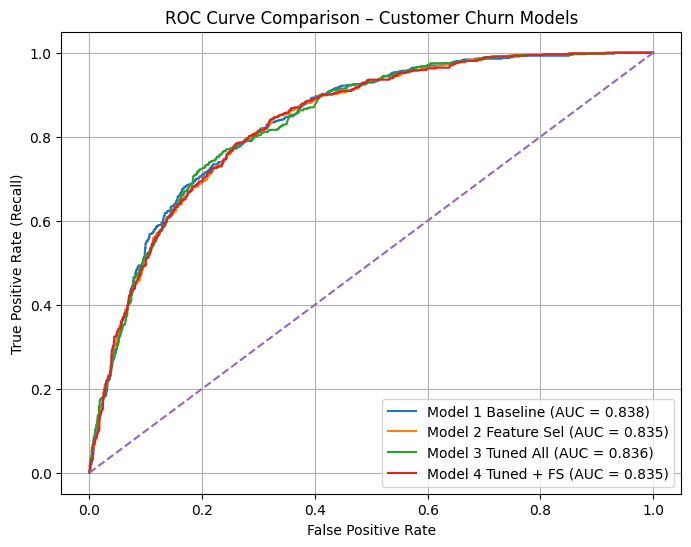

In [ ]:
plt.figure(figsize=(8,6))

plt.plot(fpr1, tpr1, label=f'Model 1 Baseline (AUC = {auc1:.3f})')
plt.plot(fpr2, tpr2, label=f'Model 2 Feature Sel (AUC = {auc2:.3f})')
plt.plot(fpr3, tpr3, label=f'Model 3 Tuned All (AUC = {auc3:.3f})')
plt.plot(fpr4, tpr4, label=f'Model 4 Tuned + FS (AUC = {auc4:.3f})')

plt.plot([0,1], [0,1], linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve Comparison – Customer Churn Models")
plt.legend()
plt.grid()
plt.show()


Business Logic: False Positives vs False Negatives
In Churn Prediction:

False Positive (FP)
→ Offer discount to loyal customer
→ Low cost

False Negative (FN)
→ Customer leaves without intervention
→ High revenue loss

📌 Therefore:

False positives are cheaper than false negatives.
and False Negative dependent on the recall which we get high in model

**🔥 Model 4 Advantage**

Even though AUC is similar:

✔ Highest Recall → catches most churners

✔ Best F1 Score → best balance

✔ Uses fewer features → less multicollinearity

✔ Easier to explain & deploy

✔ Business-aligned objective